In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings(action="ignore")


In [3]:
data = pd.read_csv('../Notebooks/Wine.csv', header = None)

In [4]:
data.columns= ['Name',
               'Alcohol',
               'MalicAcid',
               'Ash',
               'Ashalcalinity',
               'Magnesium',
               'TotalPhenols',
               'Flavanoids',
               'NonFlavanoidPhenols',
               'Proanthocyanins',
               'ColorIntensity',
               'Hue',
               'od280_od315',
               'Proline'
              ]

In [5]:
data

,Name,Alcohol,MalicAcid,Ash,Ashalcalinity,Magnesium,TotalPhenols,Flavanoids,NonFlavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,od280_od315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
X = data[['Alcohol', 'MalicAcid', 'Ash', 'Ashalcalinity', 'Magnesium',
       'TotalPhenols', 'Flavanoids', 'NonFlavanoidPhenols', 'Proanthocyanins',
       'ColorIntensity', 'Hue', 'od280_od315', 'Proline']]
Y = data.drop(columns = X.columns)

In [7]:
selector = VarianceThreshold(threshold = 0.9)
features =selector.fit(X)


In [8]:
features.get_feature_names_out()


array(['MalicAcid', 'Ashalcalinity', 'Magnesium', 'Flavanoids',
       'ColorIntensity', 'Proline'], dtype=object)

In [16]:
newdata=data[features.get_feature_names_out()]

newX = newdata

newX

,MalicAcid,Ashalcalinity,Magnesium,Flavanoids,ColorIntensity,Proline
0,1.71,15.6,127,3.06,5.64,1065
1,1.78,11.2,100,2.76,4.38,1050
2,2.36,18.6,101,3.24,5.68,1185
3,1.95,16.8,113,3.49,7.80,1480
4,2.59,21.0,118,2.69,4.32,735
...,...,...,...,...,...,...
173,5.65,20.5,95,0.61,7.70,740
174,3.91,23.0,102,0.75,7.30,750
175,4.28,20.0,120,0.69,10.20,835
176,2.59,20.0,120,0.68,9.30,840


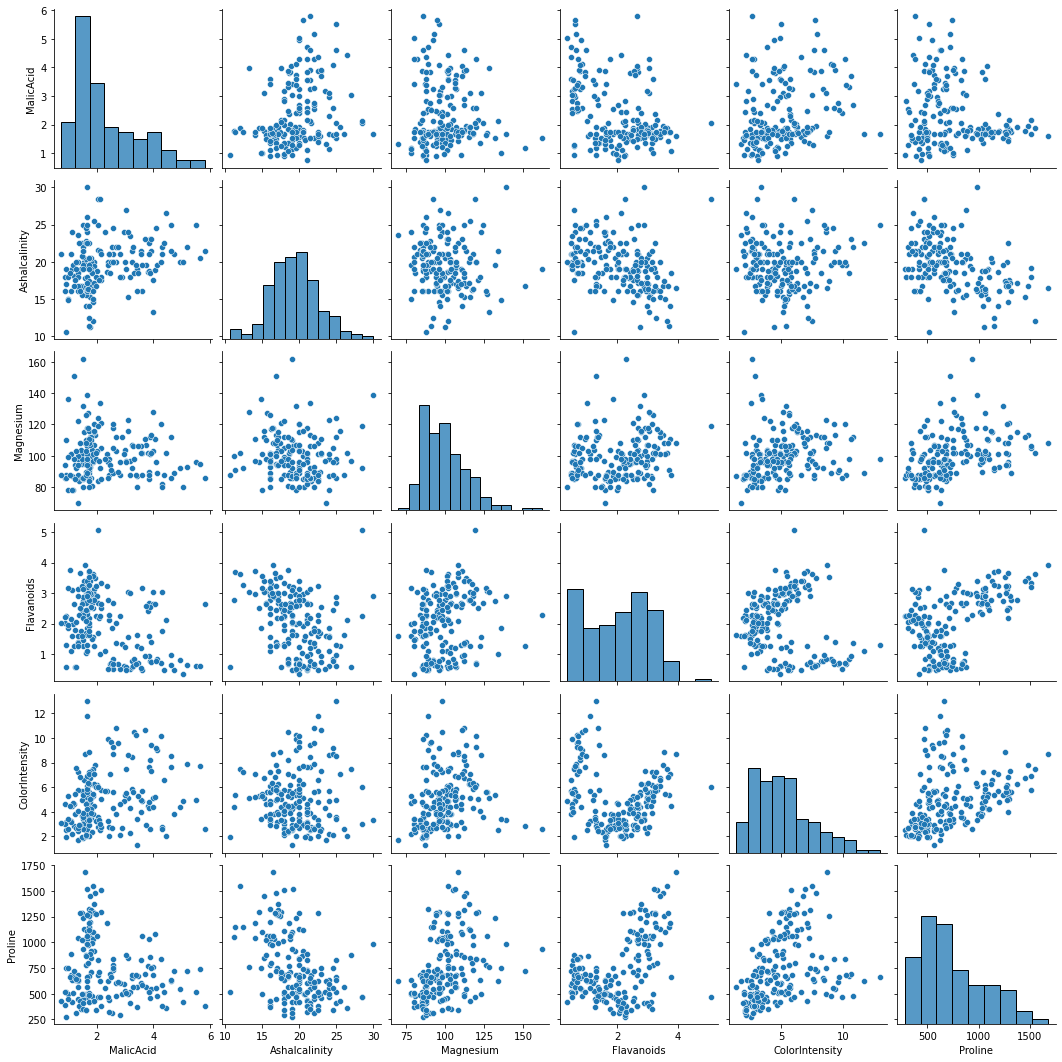

In [10]:
sns.pairplot(newX)

<AxesSubplot:>

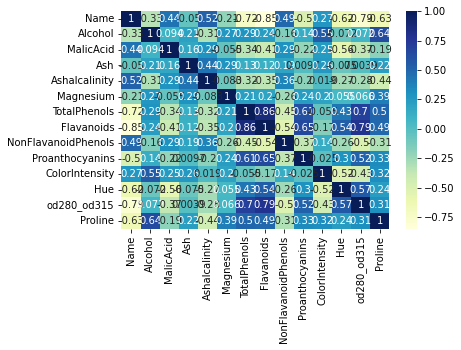

In [11]:
sns.heatmap(data.corr(), annot = True, cmap='YlGnBu')

<AxesSubplot:>

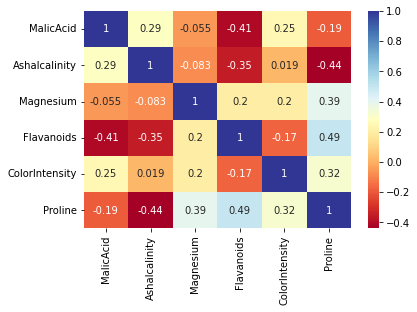

In [12]:
sns.heatmap(newdata.corr(),cmap='RdYlBu',annot = True)

# Reorder categorical data of Y
## Y has three different name classes 1,2, and 3. However cross_val_score doesnt know how to validate classes if they didn't start from 0, so the new ordering of classes of the target variable will be 0,1, and 2. I defined a function that does that for us.

In [20]:
def ordinal_encode(dataframe, column, ordering): # function to convert ordinal categorical data into numerical values
    dataframe = dataframe.copy()
    dataframe[column] = dataframe[column].apply(lambda x: ordering.index(x))
    return dataframe

def preprocess_inputs(dataframe): # function that takes the ordinal_encode function and applys it to the specified column of
    dataframe =  dataframe.copy() # a specified dataset
    #encode ordering for month and day
    dataframe = ordinal_encode(
        dataframe,
        column='Name',
        ordering=[
            1,
            2,
            3
        ]
    )
    return dataframe

newY = preprocess_inputs(Y)


,Name
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(newX, newY, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
Y_train

(124, 6)
(54, 6)


,Name
22,0
108,1
175,2
145,2
71,1
...,...
103,1
67,1
117,1
47,0


In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


In [24]:
results = []
names = []
listRes = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state= None)
    cv_result = cross_val_score(model,X_train,Y_train.values.ravel(), cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    listRes.append(results[i].mean()*100)
    print(names[i],results[i].mean()*100)
    
print('=========================================================================')    
print('Best performing model is: ', names[listRes.index(max(listRes))], 'with an accuracy of %' ,max(listRes))

Logistic Regression: 94.35897435897435
Naive Bayes: 95.12820512820511
K-Nearest Neighbour: 71.92307692307692
Decision Tree: 87.11538461538461
Support Vector Machine-linear: 95.25641025641025
Support Vector Machine-rbf: 62.94871794871795
Random Forest: 91.2179487179487
eXtreme Gradient Boost: 93.58974358974359
MLP: 30.192307692307697
AdaBoostClassifier: 84.03846153846153
GradientBoostingClassifier: 91.15384615384615
Best performing model is:  Support Vector Machine-linear: with an accuracy of % 95.25641025641025
